# 10. Convolutional neural networks

In this assignment you'll use a photo-Z dataset acquired from the observations of the SDSS telescope located in New Mexico. The goal is to predict redshifts from multiband images of galaxies. As a warmup you'll work with the SVHN dataset.

**<font color='red'>[WARN]:</font> For this assignment you'll need significantly more computational power compared to previous assignments! If you don't have a CUDA-capable GPU with >4Gb VRAM and >8Gb RAM, then you're advised to work on Google Colab!**

### 1. Load the Street View House Numbers (SVHN) dataset

-   Download the SVHN database and load the train and test datasets!
    There are multiple ways to do this. The easiest one is probably to install
    and use the `extra-keras-datasets` Python package. You need to use the
    standard/normal SVHN dataset only and NOT the one titled as `extra`!
    (Of course, if you have enough RAM and VRAM, you can work with that one
    too, if you want...)
-   Preprocess the downloaded data if needed to be able to use it for training
    and testing!
-   Normalize the pixel values into the interval of [0,1]!
-   How many and what classes do we have in the dataset? How many train and test
    examples do we have?
-   What are the dimensions of the images?
-   Show some images randomly from the dataset!
-   Make one-hot encoding for the labels!

### 2. Create a convolutional neural network for the SVHN dataset

-   Train the following network on the training set and generate
    prediction for the test images:
    ```
          > conv2D, 16 kernels, kernel size = (3,3), valid padding, relu actvation
          > conv2D, 16 kernels, kernel size = (3,3), valid padding, relu actvation
          > maxpooling kernel size = (2,2)
          > conv2D, 32 kernels, kernel size = (3,3), valid padding, relu actvation
          > conv2D, 32 kernels, kernel size = (3,3), valid padding, relu actvation
          > maxpooling pool size = (2,2) strides = (2,2)
          > flatten
          > dense, 10 neurons, softmax activation
    ```
    -   Use Adam optimizer with default parameters
    -   Use categorical crossentropy as loss function
    -   Compile the model
    -   Print out a summary of the model
    -   Train the CNN on the training data for 25 epochs with batch size
        of 64
    -   Use the test data as validation data

-   Calculate the categorical cross-entropy loss and the accuracy!
    **<font color='green'>[HINT]:</font>** you should get at least $\approx$ 80-90%
    accuracy.
-   Plot the training and the validation loss and accuracy on the same plot!
    Do we experience overfitting?
-   Show the confusion matrix of the predictions!

### 3. Load the Sload Digital Sky Survey (SDSS) Dataset

You can download the dataset from Kaggle via
[this link](https://www.kaggle.com/masterdesky/multiband-photoz-sdss-dr16).

-   Download the images from Kaggle (~10'000 images total) 
-   Preprocess the images similarly to the SVHN dataset if needed! (Normalize
    pixel values to [0,1], etc.)
-   What are the dimensions of the images?
-   Show 15 images randomly from the dataset!
-   Create a train-test-validation split using `train_test_split` from `sklearn`
    where the test size is $0.33$ and the validation size is $0.2$
    -   Set a random seed
    -   Print the number of images in each of these sets after you've created
        them

### 4. Create a convolutional neural network for the SDSS dataset

-   Train the following network on the training set and generate
    prediction for the test images:
    ```
          > conv2D, 32 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > conv2D, 32 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > maxpooling pool size = (2,2), strides = (2,2)
          
          > conv2D, 64 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > conv2D, 64 kernels, kernel size = (1,1), same padding
          > batch normalization
          > relu actvation
          > conv2D, 64 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > maxpooling pool size = (2,2), strides = (2,2)
          
          > global pooling
          > dense, 1 neuron, no activation
    ```

    -   Use Adam optimizer with default parameters
    -   Use mean squared error as loss function
    -   Compile the model
    -   Print out a summary of the model
    -   Use the created validation set as validation during the training
    -   Train the CNN on the training data for 25 epochs with batch size
        of 64

-   Calculate and print out the final accuracy using the R2 score!

### 5. Evaluate performance

-   Plot the training and the validation loss on the same plot!
-   Show the predicted values vs the actual labels on a plot!
-   Where does the model make mistakes? Try to plot the images corresponding to
    some outlier values!

### 6. Train an other CNN

-   The previous architecture can be further improved.
-   Come up with an architecture that can achieve more than 80-85% accuracy on 
    the test set if the accuracy metric is the R2 score!
    -   You can use any tool for this task.
    -   Remember that there are different losses and optimizers, early stopping,
        regularization, etc. that can be useful for you. You can find more about 
        these eg. in the
        [tensorflow/keras documentation](https://www.tensorflow.org/api_docs/python/tf/all_symbols).
    -   Don't forget that you can add more layers to the model and train for
        more epochs too... :)
-   Print out the summary of this model!
-   Plot the loss curves for this model too!

### 1. Load the Street View House Numbers (SVHN) dataset

-   Download the SVHN database and load the train and test datasets!
    There are multiple ways to do this. The easiest one is probably to install
    and use the `extra-keras-datasets` Python package. You need to use the
    standard/normal SVHN dataset only and NOT the one titled as `extra`!
    (Of course, if you have enough RAM and VRAM, you can work with that one
    too, if you want...)
-   Preprocess the downloaded data if needed to be able to use it for training
    and testing!
-   Normalize the pixel values into the interval of [0,1]!
-   How many and what classes do we have in the dataset? How many train and test
    examples do we have?
-   What are the dimensions of the images?
-   Show some images randomly from the dataset!
-   Make one-hot encoding for the labels!

In [2]:
#pip install extra-keras-datasets

In [3]:
import extra_keras_datasets
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
#load data
(x_train, y_train), (x_test, y_test) = extra_keras_datasets.svhn.load_data()

INFO:root:Loading dataset = svhn


64290816/64275384 [==============================] - 5s 0us/step


In [5]:
#normalize iton 0,1
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
#unique labels
np.unique(y_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [7]:
#10 classes--> 1,2,3,4,5,6,7,8,9,10
#one-hote encoding
y_train = keras.utils.to_categorical(y_train-1)
y_test  = keras.utils.to_categorical(y_test-1)

In [8]:
#training set
print('x shape:',x_train.shape)
print('y shape:',y_train.shape)

x shape: (73257, 32, 32, 3)
y shape: (73257, 10)


In [9]:
#test set
print('x shape:',x_test.shape)
print('y shape:',y_test.shape)

x shape: (26032, 32, 32, 3)
y shape: (26032, 10)


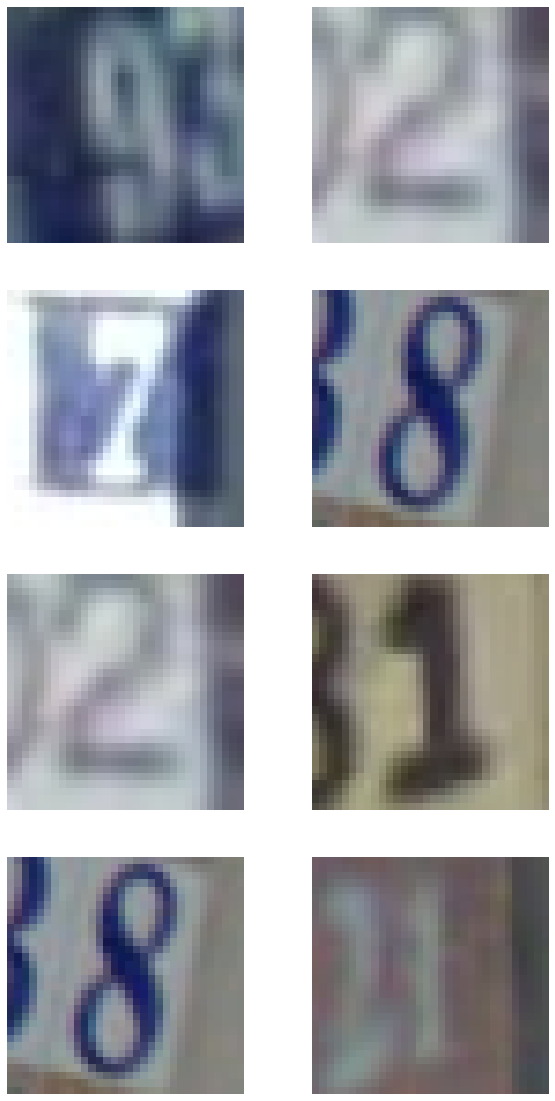

In [10]:
#there are 32X32 sized rgb images

index = np.arange(x_train.shape[0])
np.random.shuffle(index)

fig,axes=plt.subplots(4,2, figsize=(10,20))

for i in range(2):
    for j in range(4):
        ax=axes[j,i]
        ax.imshow(x_train[index[i*2+j]])
        ax.axis('off')

### 2. Create a convolutional neural network for the SVHN dataset

-   Train the following network on the training set and generate
    prediction for the test images:
    ```
          > conv2D, 16 kernels, kernel size = (3,3), valid padding, relu actvation
          > conv2D, 16 kernels, kernel size = (3,3), valid padding, relu actvation
          > maxpooling kernel size = (2,2)
          > conv2D, 32 kernels, kernel size = (3,3), valid padding, relu actvation
          > conv2D, 32 kernels, kernel size = (3,3), valid padding, relu actvation
          > maxpooling pool size = (2,2) strides = (2,2)
          > flatten
          > dense, 10 neurons, softmax activation
    ```
    -   Use Adam optimizer with default parameters
    -   Use categorical crossentropy as loss function
    -   Compile the model
    -   Print out a summary of the model
    -   Train the CNN on the training data for 25 epochs with batch size
        of 64
    -   Use the test data as validation data

-   Calculate the categorical cross-entropy loss and the accuracy!
    **<font color='green'>[HINT]:</font>** you should get at least $\approx$ 80-90%
    accuracy.
-   Plot the training and the validation loss and accuracy on the same plot!
    Do we experience overfitting?
-   Show the confusion matrix of the predictions!

In [11]:
#create model
model = keras.models.Sequential([keras.layers.InputLayer(input_shape=x_train[0].shape),
                                 keras.layers.Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu'),
                                 keras.layers.Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu'),
                                 keras.layers.MaxPooling2D((3,3)),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'),
                                 keras.layers.MaxPooling2D((2,2), strides=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(10, activation='softmax')])


model.compile(optimizer=keras.optimizers.SGD(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy','AUC'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 16)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                    

In [12]:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [13]:
history = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=64 )

Epoch 1/25
1145/1145 [==============================] - 43s 11ms/step - loss: 1.1265 - accuracy: 0.6415 - val_loss: 0.7574 - val_accuracy: 0.7832
Epoch 2/25
1145/1145 [==============================] - 12s 11ms/step - loss: 0.6202 - accuracy: 0.8205 - val_loss: 0.6088 - val_accuracy: 0.8295
Epoch 3/25
1145/1145 [==============================] - 13s 11ms/step - loss: 0.5207 - accuracy: 0.8490 - val_loss: 0.5452 - val_accuracy: 0.8443
Epoch 4/25
1145/1145 [==============================] - 12s 10ms/step - loss: 0.4604 - accuracy: 0.8655 - val_loss: 0.5053 - val_accuracy: 0.8550
Epoch 5/25
1145/1145 [==============================] - 12s 10ms/step - loss: 0.4215 - accuracy: 0.8767 - val_loss: 0.4721 - val_accuracy: 0.8631
Epoch 6/25
1145/1145 [==============================] - 12s 10ms/step - loss: 0.3953 - accuracy: 0.8837 - val_loss: 0.4681 - val_accuracy: 0.8658
Epoch 7/25
1145/1145 [==============================] - 13s 11ms/step - loss: 0.3754 - accuracy: 0.8884 - val_loss: 0.4290 -

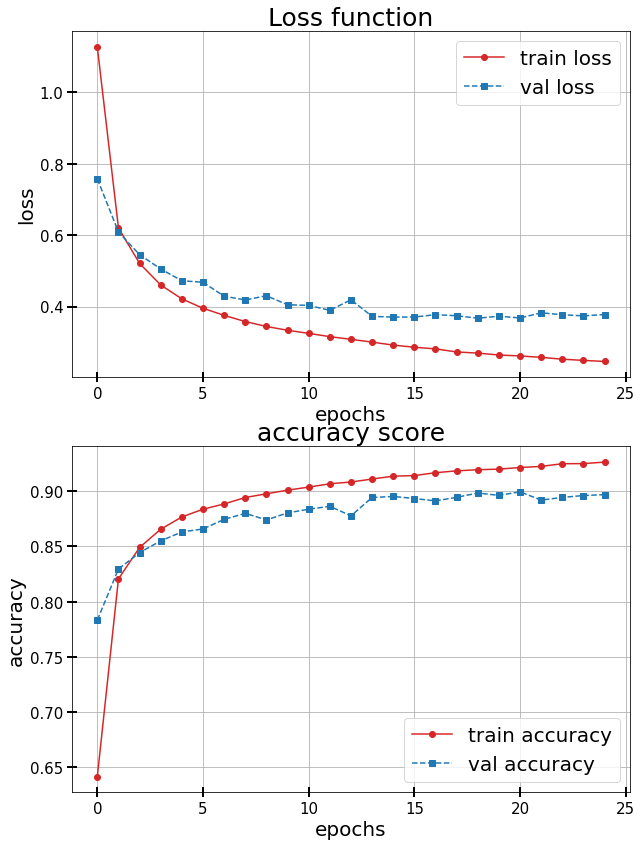

In [14]:
#plot the history, confusion matrix
fig,axes = plt.subplots(2,1, figsize=(10,14))

ax=axes[0]
ax.plot(history.history['loss'], label='train loss', ls='-', marker='o', color='tab:red')
ax.plot(history.history['val_loss'], label='val loss',ls='--', marker='s', color='tab:blue')
ax.set_ylabel('loss', fontsize=20)
ax.set_xlabel('epochs', fontsize=20)
ax.tick_params(labelsize=15,size=10,width=2,direction='inout')
ax.grid()
ax.set_title('Loss function',fontsize=25)
ax.legend(fontsize=20)

ax=axes[1]
ax.plot(history.history['accuracy'], label='train accuracy', ls='-', marker='o', color='tab:red')
ax.plot(history.history['val_accuracy'], label='val accuracy',ls='--', marker='s', color='tab:blue')

ax.set_ylabel('accuracy', fontsize=20)
ax.set_xlabel('epochs', fontsize=20)
ax.set_title('accuracy score',fontsize=25)
ax.legend(fontsize=20)
ax.tick_params(labelsize=15,size=10,width=2,direction='inout')
ax.grid()

plt.show()

Over 25 epochs, we did not experience overfitting. The training loss decreases more, but the validation loss does not start to increase. 

In [15]:
#function to calculate and plot the confusion matrix from the previous homeworks
from sklearn.metrics import confusion_matrix
def conf_matrix(y,y_pred, figsize=(8,8)):
    cm=confusion_matrix(y, y_pred)

    fig,ax=plt.subplots(1,1,figsize=figsize)
    mp=ax.imshow(cm.T)
    fig.colorbar(mp)
    u = np.unique(y)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)

    ax.set_yticks(np.arange(len(u)))
    ax.set_yticklabels(u)


    ax.set_xticks(np.arange(-.5, len(u), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(u),1), minor=True)

    ax.grid(which='minor', color='k', linestyle='-', linewidth=4)
    ax.tick_params(labelsize=15, direction='inout', size=10, width=2)

    ax.set_ylabel('Real label', fontsize=20)
    ax.set_xlabel('Predicted label', fontsize=20)

    for i in np.arange(0,len(u),1):
        for j in np.arange(0,len(u),1):
            ax.text(i,j,str(cm[i,j]),ha="center", va="center", color="k", fontsize=20)
    plt.show()

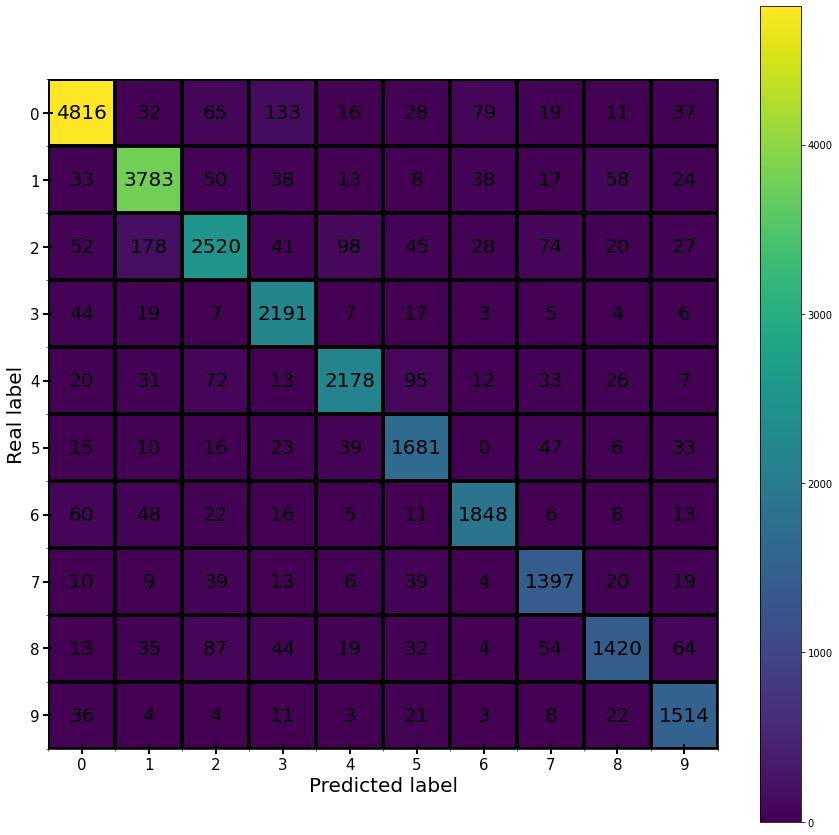

In [16]:
#create prediction and plot the confusion matrix
y_pred=model.predict(x_test)
conf_matrix(tf.argmax(y_test, axis = 1),tf.argmax(y_pred, axis = 1), figsize=(15,15))

In [17]:
#categorical cross-entropy
y_pred=model.predict(x_test)
print('categorical cross-entropy:',np.sum(keras.losses.categorical_crossentropy(y_test,y_pred))/len(y_test))
#accuracy
m = tf.keras.metrics.Accuracy()
m.update_state(np.argmax(y_pred,axis=1),np.argmax(y_test,axis=1))
print('accuracy:',m.result().numpy())

categorical cross-entropy: 0.37408601072718195
accuracy: 0.8968961


### 3. Load the Sload Digital Sky Survey (SDSS) Dataset

You can download the dataset from Kaggle via
[this link](https://www.kaggle.com/masterdesky/multiband-photoz-sdss-dr16).

-   Download the images from Kaggle (~10'000 images total) 
-   Preprocess the images similarly to the SVHN dataset if needed! (Normalize
    pixel values to [0,1], etc.)
-   What are the dimensions of the images?
-   Show 15 images randomly from the dataset!
-   Create a train-test-validation split using `train_test_split` from `sklearn`
    where the test size is $0.33$ and the validation size is $0.2$
    -   Set a random seed
    -   Print the number of images in each of these sets after you've created
        them

In [18]:
import pandas as pd

In [21]:
#download the data set from kaggle (to google colab) based on: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# ! pip install kaggle
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/ ##move the token
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets download masterdesky/multiband-photoz-sdss-dr16
#! unzip multiband-photoz-sdss-dr16.zip

In [22]:
DF = pd.read_csv('/content/skyserver_photoZ_data_DR16.csv')
display(DF.head(10))
y=DF.values[:,-1]
y=y.reshape(y.size,1)#redshift

,specObjID,ra,dec,z
0,5457255364792963072,179.94568,5.601128,0.611592
1,5457264435763892224,179.87307,5.536654,0.519419
2,947020949721475072,179.87175,5.579883,0.129071
3,5457264985519706112,179.70930,5.616096,0.632514
4,5457265260397613056,179.68102,5.596931,0.682077
5,5457264710641799168,179.81206,5.622437,0.522675
6,5457264160885985280,179.77058,5.586894,0.681349
7,946995386076129280,179.77003,5.611734,0.129314
8,947019300454033408,179.65887,5.303156,0.168927
9,947014077773801472,179.67420,5.342887,0.074837


In [23]:
#keras.preprocessing.image_dataset_from_directory('images',image_size=(96, 96,4)) <- can not be used because the name of the figure contains a '.'

#load the figures manually by matplotlib
import os 

figs = os.listdir('images')
X = []#np.empty((len(figs)), dtype=object)
for i,fig in enumerate(figs):
    X.append(plt.imread('/content/images/'+fig,)[:,:,0:3])

X = np.asarray(X) 

In [24]:
#the figures are 96X96 rgb figures, the value of the pixels is between 0 and 1

X[0].shape

(96, 96, 3)

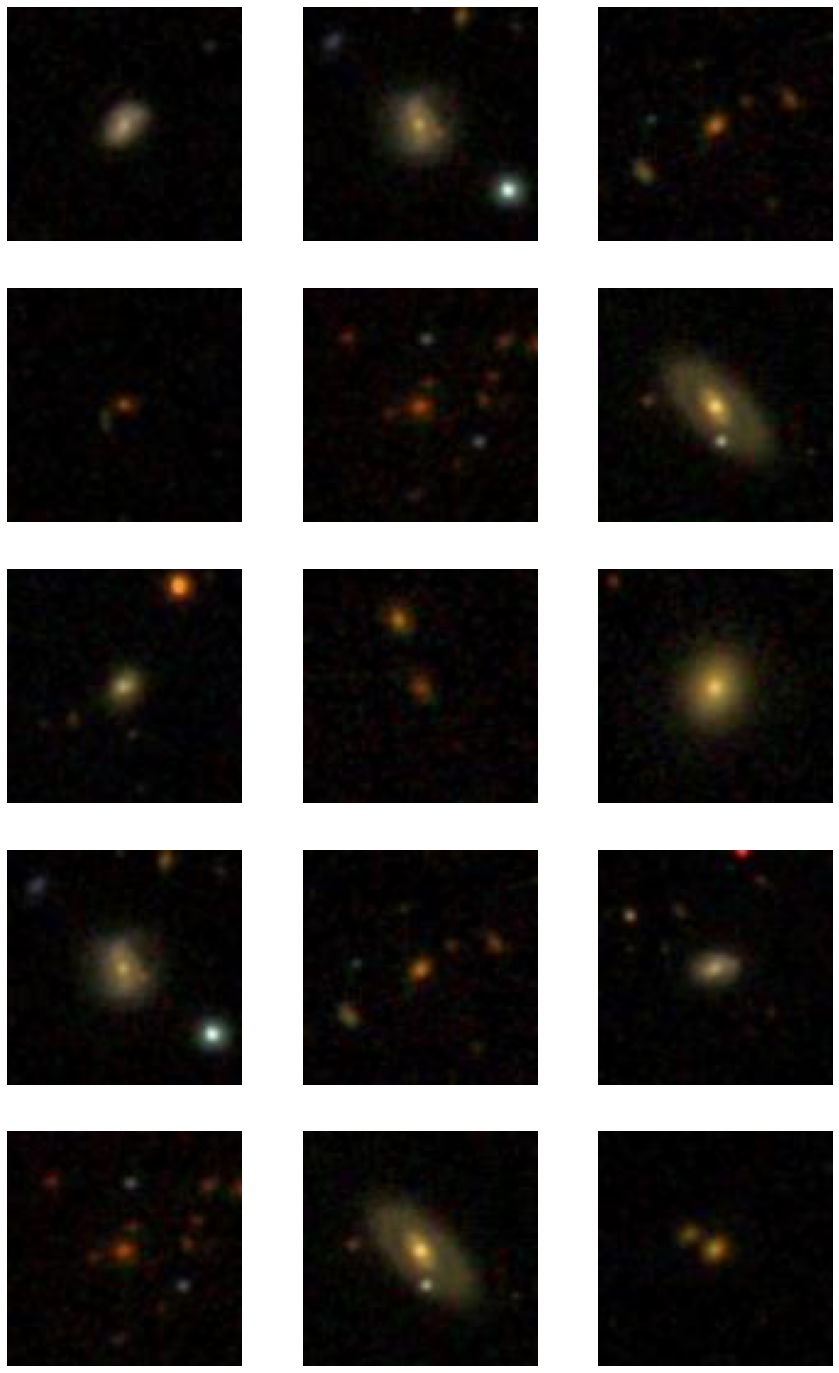

In [25]:
index = np.arange(X.shape[0])
np.random.shuffle(index)

fig,axes=plt.subplots(5,3, figsize=(15,25))

for i in range(3):
    for j in range(5):
        ax=axes[j,i]
        ax.imshow(X[index[i*3+j]])
        ax.axis('off')

In [26]:
#order the figures acording to the skyserver_photoZ_data_DR16.csv
n = np.empty(len(figs),dtype=int)
for i,fig in enumerate(figs):
    n[i] = int(fig.split('_')[0])

X = X[np.argsort(n)]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#split the dataset
test_size=0.33
validation_size=0.2

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size+validation_size, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=validation_size/(test_size+validation_size), random_state=42)

In [29]:
print('train size:',100*np.round(X_train.shape[0]/(X_train.shape[0]+ X_test.shape[0] + X_val.shape[0]),3),'% (number of images:',X_train.shape[0],')')
print('test size:',100*np.round(X_test.shape[0]/(X_train.shape[0]+ X_test.shape[0] + X_val.shape[0]),3),'% (number of images:',X_test.shape[0],')')
print('validation size:',100*np.round(X_val.shape[0]/(X_train.shape[0]+ X_test.shape[0] + X_val.shape[0]),3),'% (number of images:',X_val.shape[0],')')


train size: 47.0 % (number of images: 4628 )
test size: 33.0 % (number of images: 3249 )
validation size: 20.0 % (number of images: 1970 )


### 4. Create a convolutional neural network for the SDSS dataset

-   Train the following network on the training set and generate
    prediction for the test images:
    ```
          > conv2D, 32 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > conv2D, 32 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > maxpooling pool size = (2,2), strides = (2,2)
          
          > conv2D, 64 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > conv2D, 64 kernels, kernel size = (1,1), same padding
          > batch normalization
          > relu actvation
          > conv2D, 64 kernels, kernel size = (3,3), same padding
          > batch normalization
          > relu actvation
          > maxpooling pool size = (2,2), strides = (2,2)
          
          > global pooling
          > dense, 1 neuron, no activation
    ```

    -   Use Adam optimizer with default parameters
    -   Use mean squared error as loss function
    -   Compile the model
    -   Print out a summary of the model
    -   Use the created validation set as validation during the training
    -   Train the CNN on the training data for 25 epochs with batch size
        of 64

-   Calculate and print out the final accuracy using the R2 score!

In [30]:
model = keras.models.Sequential([keras.layers.InputLayer(input_shape=X_train[0].shape),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                                 keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                                 keras.layers.GlobalAveragePooling2D(),
                                 keras.layers.Dense(1, activation=None)])


model.compile(optimizer=keras.optimizers.Adam(),
              loss = 'mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                      

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=64 )

Epoch 1/25
73/73 [==============================] - 12s 139ms/step - loss: 0.0689 - val_loss: 0.0678
Epoch 2/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0144 - val_loss: 0.0732
Epoch 3/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0132 - val_loss: 0.0605
Epoch 4/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0098 - val_loss: 0.0393
Epoch 5/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0093 - val_loss: 0.0398
Epoch 6/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0086 - val_loss: 0.0350
Epoch 7/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0087 - val_loss: 0.0297
Epoch 8/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0075 - val_loss: 0.0155
Epoch 9/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0073 - val_loss: 0.0133
Epoch 10/25
73/73 [==============================] - 9s 123ms/step - loss: 0.0065 - val_loss: 0.013

In [35]:
#pip install tensorflow_addons

import tensorflow_addons as tfa

In [36]:
m = tfa.metrics.r_square.RSquare()
y_pred=model.predict(X_test)
m.update_state(y_test.T[0], y_pred.T[0])
print('R2 score:',m.result().numpy())

R2 score: 0.82144916


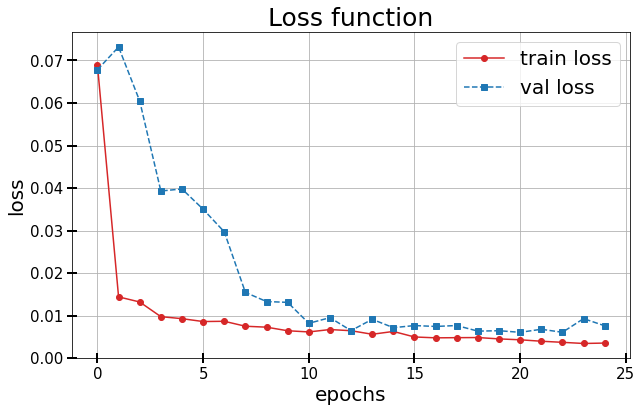

In [37]:
fig,ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(history.history['loss'], label='train loss', ls='-', marker='o', color='tab:red')
ax.plot(history.history['val_loss'], label='val loss',ls='--', marker='s', color='tab:blue')
ax.set_ylabel('loss', fontsize=20)
ax.set_xlabel('epochs', fontsize=20)
ax.tick_params(labelsize=15,size=10,width=2,direction='inout')
ax.grid()
ax.set_title('Loss function',fontsize=25)
ax.legend(fontsize=20)

plt.show()

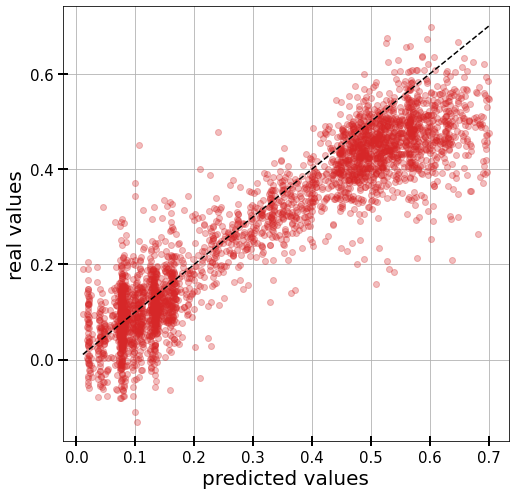

In [38]:
fig,ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(y_test,y_pred, marker='o', color='tab:red', ls='', alpha=0.3)
ax.plot(np.linspace(np.min(y_test),np.max(y_test)), np.linspace(np.min(y_test),np.max(y_test)), 'k--')
ax.set_ylabel('real values', fontsize=20)
ax.set_xlabel('predicted values', fontsize=20)
ax.tick_params(labelsize=15,size=10,width=2,direction='inout')
ax.grid()
plt.show()

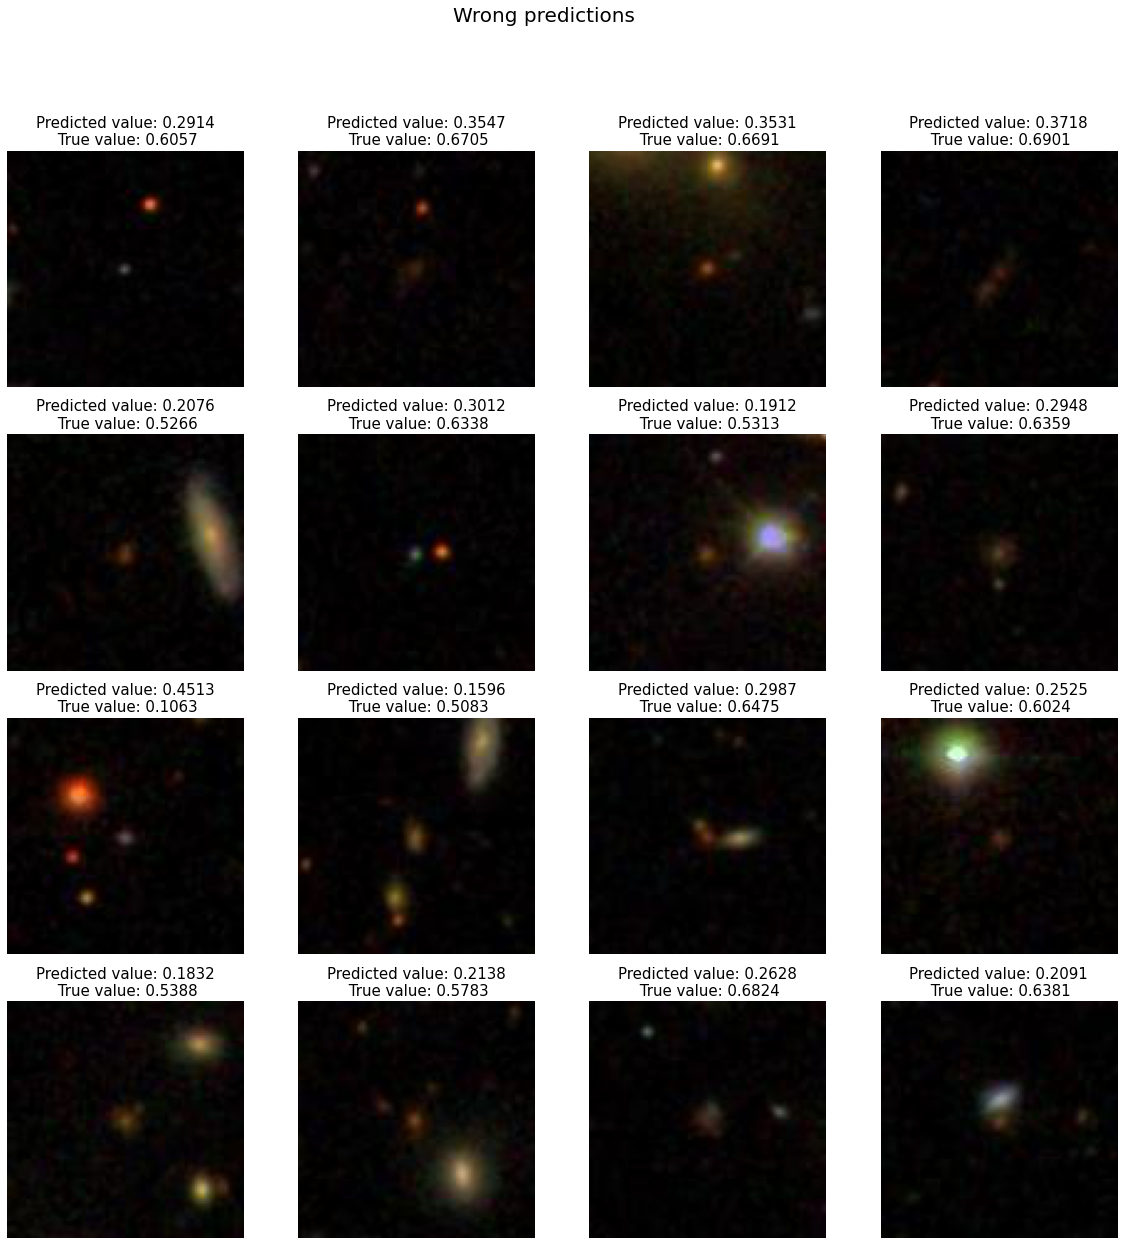

In [39]:
# plot wrong and good predictions
#the following pictures are where the square error was the greatest
np.abs(y_test-y_pred)**2
indexes = np.argsort(((y_test-y_pred)**2).T[0])[-16:]
fig,axes=plt.subplots(4,4, figsize=(20,20))
fig.suptitle('Wrong predictions', fontsize=20)
for i in range(4):
    for j in range(4):
        ax=axes[i][j]
        index = indexes[i*4+j]
        x = X_test[index]
        y_p = y_pred[index][0]
        y_t = y_test[index][0]
        ax.imshow(x)
        ax.axis('off')
        ax.set_title('Predicted value: '+str(np.round(y_p,4)) +'\n True value: '+ str(np.round(y_t,4)), fontsize=15)
plt.show()

### 6. Train an other CNN

-   The previous architecture can be further improved.
-   Come up with an architecture that can achieve more than 80-85% accuracy on 
    the test set if the accuracy metric is the R2 score!
    -   You can use any tool for this task.
    -   Remember that there are different losses and optimizers, early stopping,
        regularization, etc. that can be useful for you. You can find more about 
        these eg. in the
        [tensorflow/keras documentation](https://www.tensorflow.org/api_docs/python/tf/all_symbols).
    -   Don't forget that you can add more layers to the model and train for
        more epochs too... :)
-   Print out the summary of this model!
-   Plot the loss curves for this model too!

In [48]:
model = keras.models.Sequential([keras.layers.InputLayer(input_shape=X_train[0].shape),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                                 keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(16, kernel_size=(2,2), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(16, kernel_size=(2,2), padding='same',activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                                 keras.layers.GlobalAveragePooling2D(),
                                 keras.layers.Dense(1, activation='relu')])

#loss -> mean_absolute_error
#activatoun on the last layer -> relu => redshift: positive values

model.compile(optimizer=keras.optimizers.Adam(), loss = 'mean_absolute_error')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 96, 96, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 96, 96, 32)      

In [49]:
#batch_size=32, epochs=40
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32)

Epoch 1/40
145/145 [==============================] - 19s 120ms/step - loss: 0.1353 - val_loss: 0.1969
Epoch 2/40
145/145 [==============================] - 18s 122ms/step - loss: 0.0809 - val_loss: 0.1723
Epoch 3/40
145/145 [==============================] - 17s 118ms/step - loss: 0.0737 - val_loss: 0.1350
Epoch 4/40
145/145 [==============================] - 17s 117ms/step - loss: 0.0662 - val_loss: 0.0822
Epoch 5/40
145/145 [==============================] - 17s 117ms/step - loss: 0.0638 - val_loss: 0.0772
Epoch 6/40
145/145 [==============================] - 17s 117ms/step - loss: 0.0624 - val_loss: 0.0632
Epoch 7/40
145/145 [==============================] - 17s 117ms/step - loss: 0.0617 - val_loss: 0.0732
Epoch 8/40
145/145 [==============================] - 17s 117ms/step - loss: 0.0566 - val_loss: 0.0599
Epoch 9/40
145/145 [==============================] - 17s 116ms/step - loss: 0.0579 - val_loss: 0.0815
Epoch 10/40
145/145 [==============================] - 17s 117ms/step - l

In [50]:
m = tfa.metrics.r_square.RSquare()
y_pred=model.predict(X_test)
m.update_state(y_test.T[0], y_pred.T[0])
print('R2 score:',m.result().numpy())

R2 score: 0.90004253


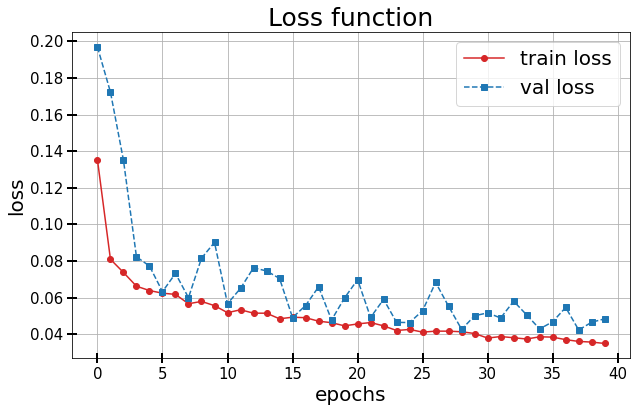

In [51]:
fig,ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(history.history['loss'], label='train loss', ls='-', marker='o', color='tab:red')
ax.plot(history.history['val_loss'], label='val loss',ls='--', marker='s', color='tab:blue')
ax.set_ylabel('loss', fontsize=20)
ax.set_xlabel('epochs', fontsize=20)
ax.tick_params(labelsize=15,size=10,width=2,direction='inout')
ax.grid()
ax.set_title('Loss function',fontsize=25)
ax.legend(fontsize=20)

plt.show()

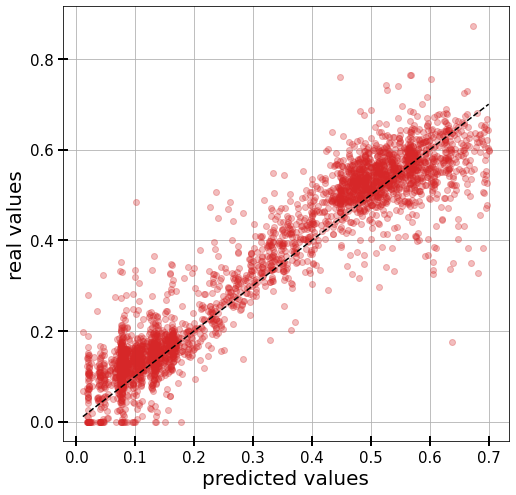

In [52]:
fig,ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(y_test,y_pred, marker='o', color='tab:red', ls='', alpha=0.3)
ax.plot(np.linspace(np.min(y_test),np.max(y_test)), np.linspace(np.min(y_test),np.max(y_test)), 'k--')
ax.set_ylabel('real values', fontsize=20)
ax.set_xlabel('predicted values', fontsize=20)
ax.tick_params(labelsize=15,size=10,width=2,direction='inout')
ax.grid()
plt.show()

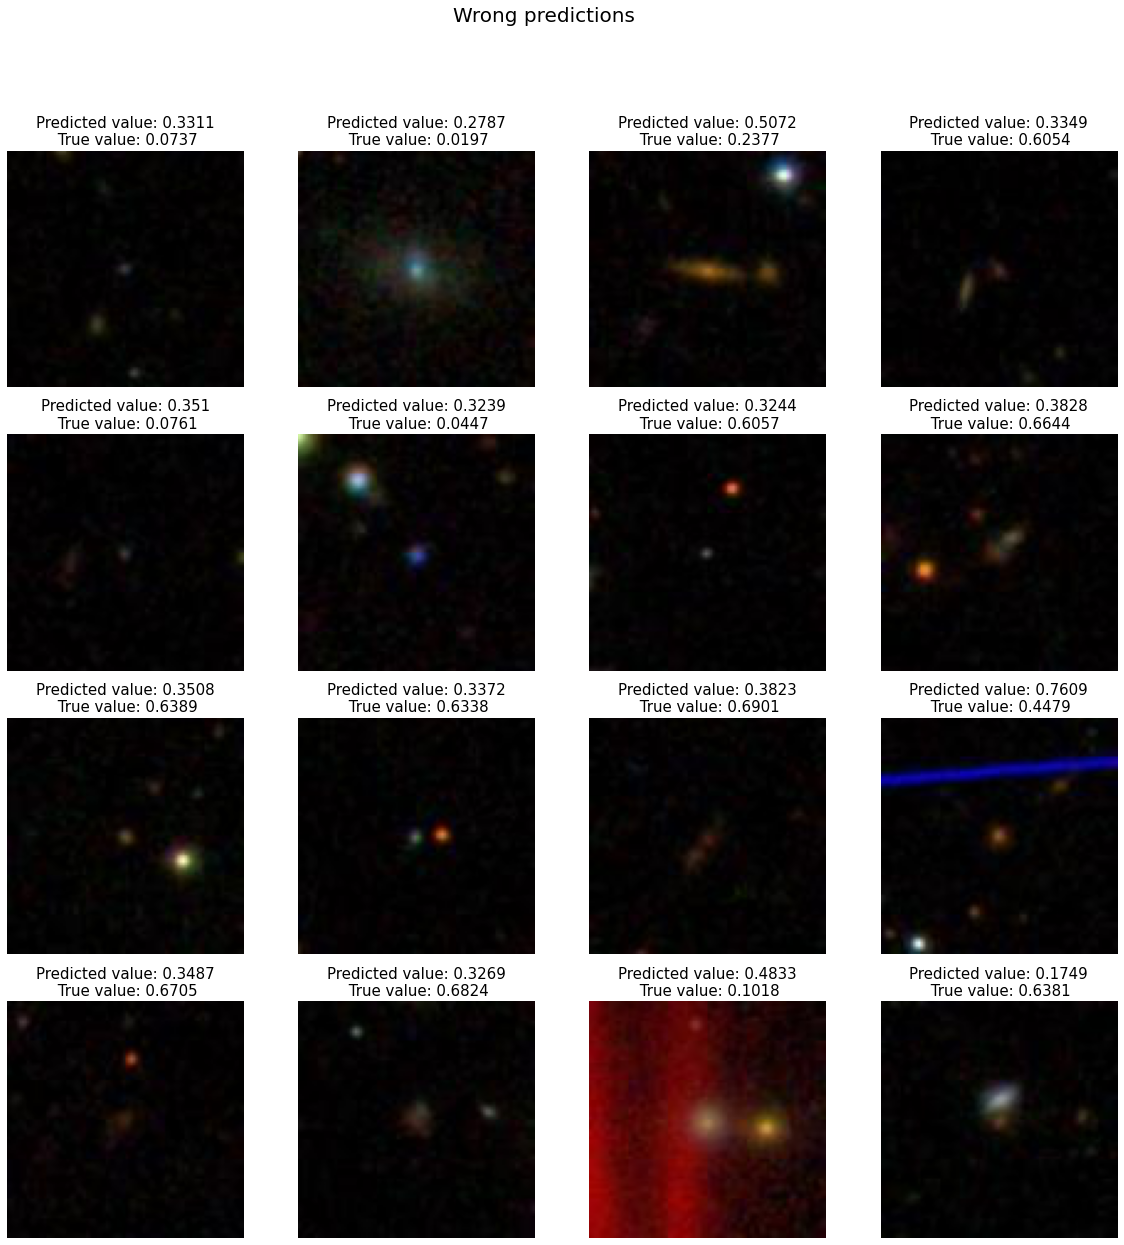

In [53]:
# plot wrong and good predictions
#the following pictures are where the square error was the greatest
np.abs(y_test-y_pred)**2
indexes = np.argsort(((y_test-y_pred)**2).T[0])[-16:]
fig,axes=plt.subplots(4,4, figsize=(20,20))
fig.suptitle('Wrong predictions', fontsize=20)
for i in range(4):
    for j in range(4):
        ax=axes[i][j]
        index = indexes[i*4+j]
        x = X_test[index]
        y_p = y_pred[index][0]
        y_t = y_test[index][0]
        ax.imshow(x)
        ax.axis('off')
        ax.set_title('Predicted value: '+str(np.round(y_p,4)) +'\n True value: '+ str(np.round(y_t,4)), fontsize=15)

plt.show()

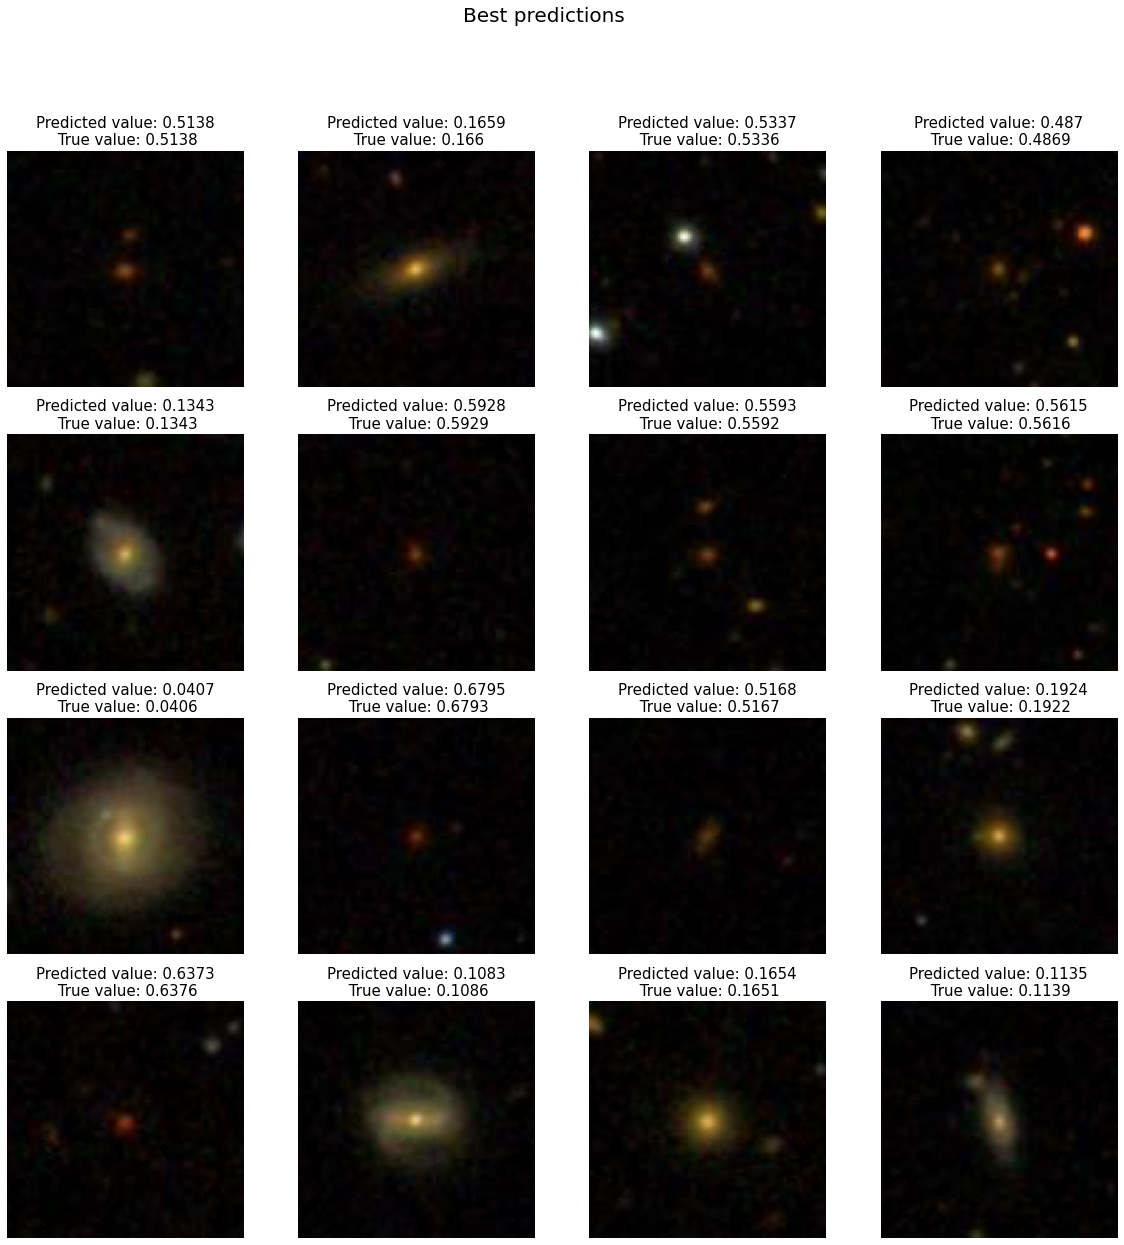

In [54]:
# plot the best and good predictions
np.abs(y_test-y_pred)**2
indexes = np.argsort(((y_test-y_pred)**2).T[0])[:16]
fig,axes=plt.subplots(4,4, figsize=(20,20))
fig.suptitle('Best predictions', fontsize=20)
for i in range(4):
    for j in range(4):
        ax=axes[i][j]
        index = indexes[i*4+j]
        x = X_test[index]
        y_p = y_pred[index][0]
        y_t = y_test[index][0]
        ax.imshow(x)
        ax.axis('off')
        ax.set_title('Predicted value: '+str(np.round(y_p,4)) +'\n True value: '+ str(np.round(y_t,4)), fontsize=15)

plt.show()